e:\College\LVL 4\image Proccessing\Project\edge_detection.py:64: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i - 1, j + 1]),
e:\College\LVL 4\image Proccessing\Project\edge_detection.py:63: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i - 1, j]),
e:\College\LVL 4\image Proccessing\Project\edge_detection.py:62: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i - 1, j - 1]),
e:\College\LVL 4\image Proccessing\Project\edge_detection.py:69: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i + 1, j + 1]),
e:\College\LVL 4\image Proccessing\Project\edge_detection.py:68: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i + 1, j]),
e:\College\LVL 4\image Proccessing\Project\edge_detection.py:67: RuntimeWarning: overflow encountered in scalar subtract
  abs(center_pixel - self.image[i + 1, j -

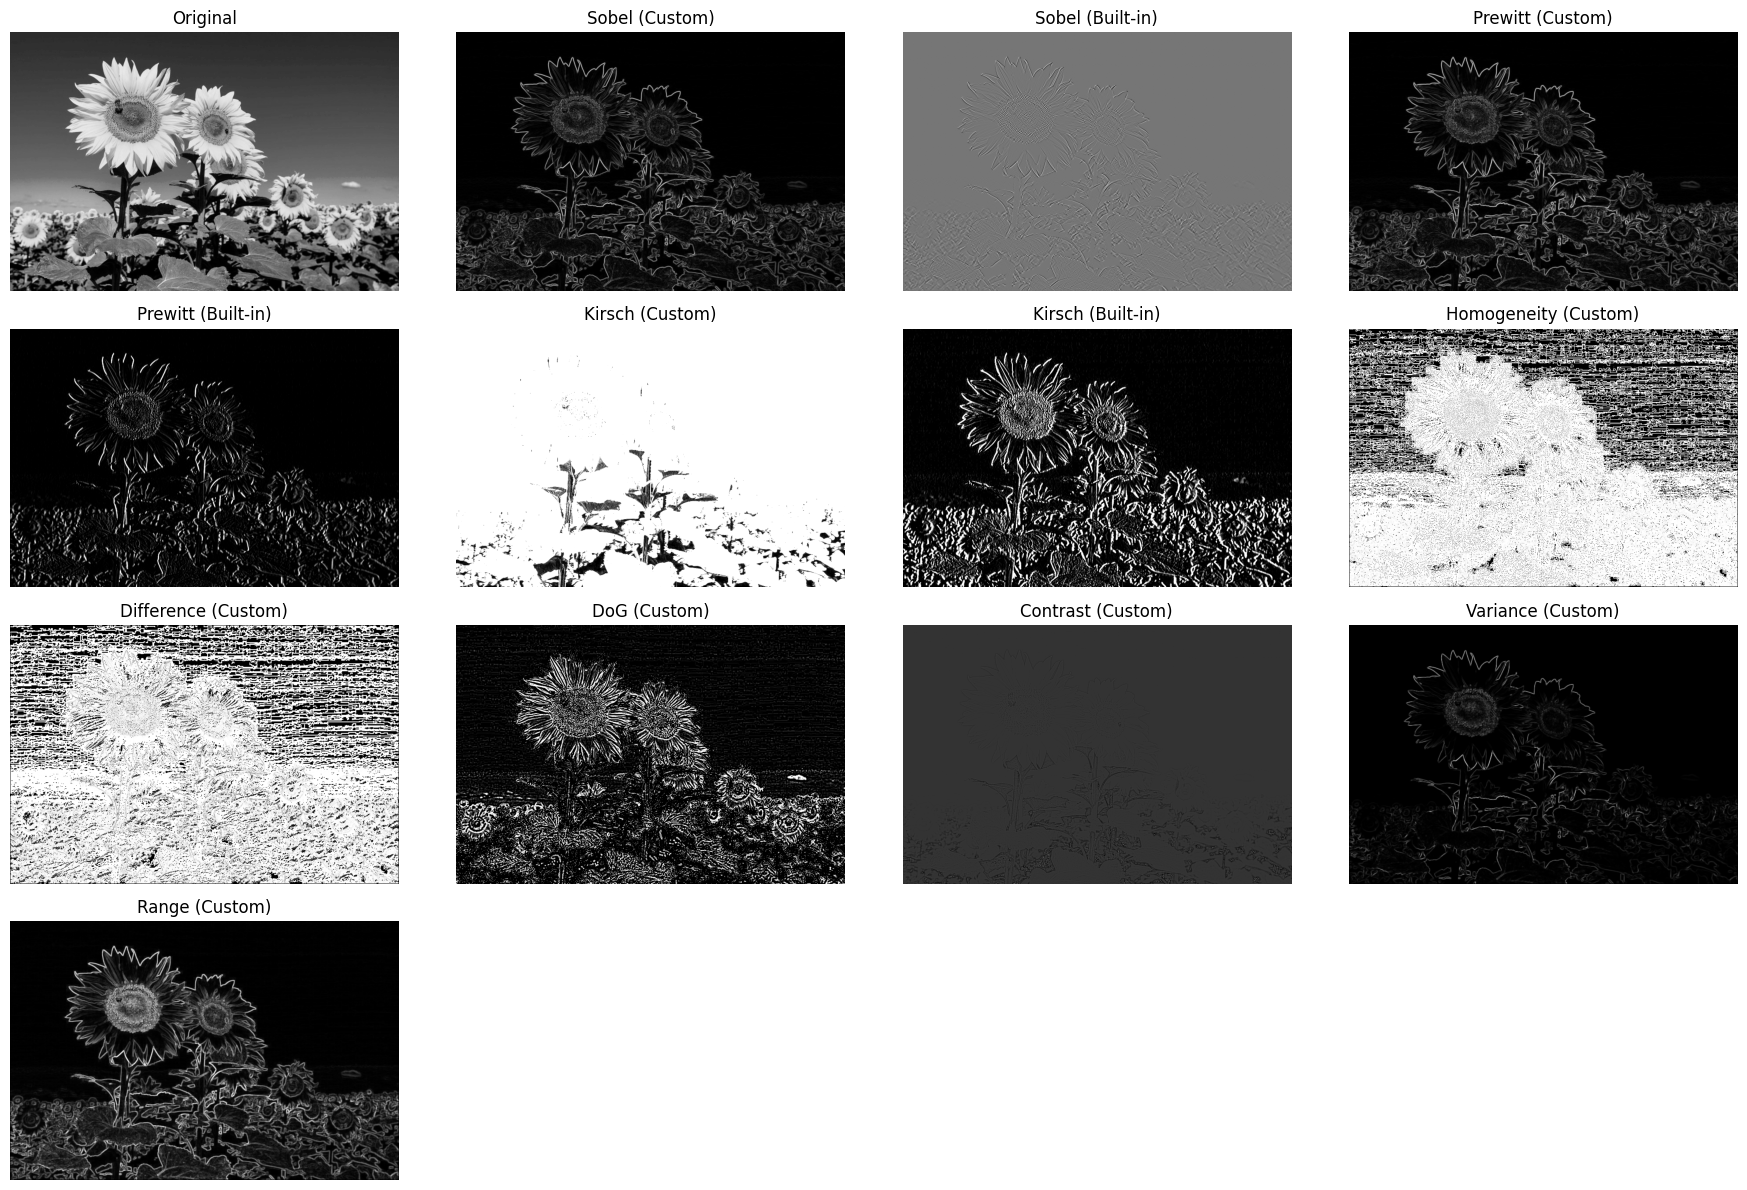

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from edge_detection import SimpleEdgeDetection, AdvancedEdgeDetection

# Load a sample image
image_path = "Images/image.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Instantiate both classes
simple_detector = SimpleEdgeDetection(image)
advanced_detector = AdvancedEdgeDetection(image)

# Apply algorithms from SimpleEdgeDetection
sobel_edges = simple_detector.apply_sobel()
prewitt_edges = simple_detector.apply_prewitt()
kirsch_edges = simple_detector.apply_kirsch()

# Apply built-in equivalents
built_in_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
built_in_prewitt = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))  # Prewitt X-axis
built_in_kirsch = cv2.filter2D(image, -1, np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]))  # Example kernel

# Apply algorithms from AdvancedEdgeDetection
homogeneity_edges = advanced_detector.homogeneity_operator()
difference_edges = advanced_detector.difference_operator()

# Define masks for DoG convolution
mask_7x7 = np.array([
    [0, 0, -1, -1, -1, 0, 0],
    [0, -2, -3, -3, -3, -2, 0],
    [-1, -3, 5, 5, 5, -3, -1],
    [-1, -3, 5, 16, 5, -3, -1],
    [-1, -3, 5, 5, 5, -3, -1],
    [0, -2, -3, -3, -3, -2, 0],
    [0, 0, -1, -1, -1, 0, 0]
], dtype=np.float32)

mask_9x9 = np.array([
    [0, 0, 0, -1, -1, -1, 0, 0, 0],
    [0, -2, -3, -3, -3, -3, -3, -2, 0],
    [0, -3, -2, -1, -1, -1, -2, -3, 0],
    [-1, -3, -1, 9, 9, 9, -1, -3, -1],
    [-1, -3, -1, 9, 19, 9, -1, -3, -1],
    [-1, -3, -1, 9, 9, 9, -1, -3, -1],
    [0, -3, -2, -1, -1, -1, -2, -3, 0],
    [0, -2, -3, -3, -3, -3, -3, -2, 0],
    [0, 0, 0, -1, -1, -1, 0, 0, 0]
], dtype=np.float32)

dog_edges, _, _ = advanced_detector.dog_convolution(mask_7x7, mask_9x9)
contrast_edges = advanced_detector.contrast_based_edge_detection()
variance_edges = advanced_detector.variance_operator()
range_edges = advanced_detector.range_operator()

# Plot results
comparison = {
    "Original": image,
    "Sobel (Custom)": sobel_edges,
    "Sobel (Built-in)": built_in_sobel,
    "Prewitt (Custom)": prewitt_edges,
    "Prewitt (Built-in)": built_in_prewitt,
    "Kirsch (Custom)": kirsch_edges,
    "Kirsch (Built-in)": built_in_kirsch,
    "Homogeneity (Custom)": homogeneity_edges,
    "Difference (Custom)": difference_edges,
    "DoG (Custom)": dog_edges,
    "Contrast (Custom)": contrast_edges,
    "Variance (Custom)": variance_edges,
    "Range (Custom)": range_edges,
}

# Display the results
plt.figure(figsize=(18, 12))
for i, (title, result) in enumerate(comparison.items(), 1):
    plt.subplot(4, 4, i)
    plt.imshow(result, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()


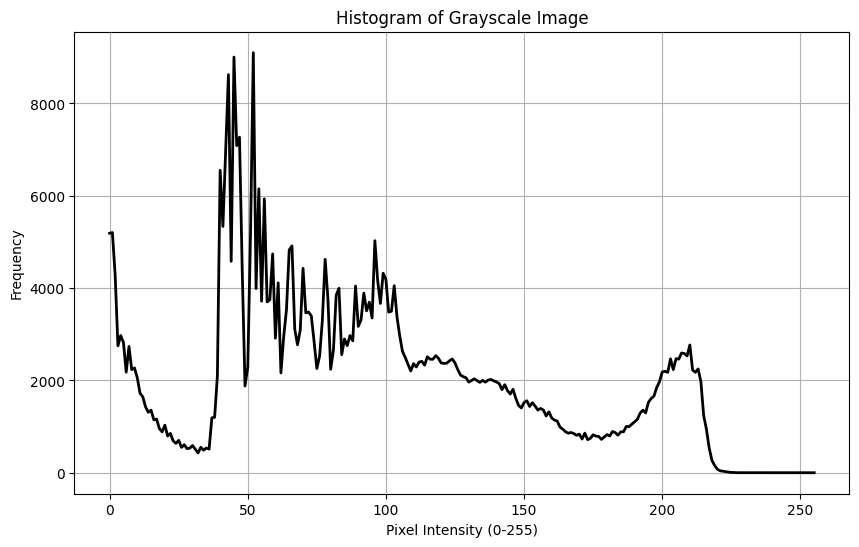

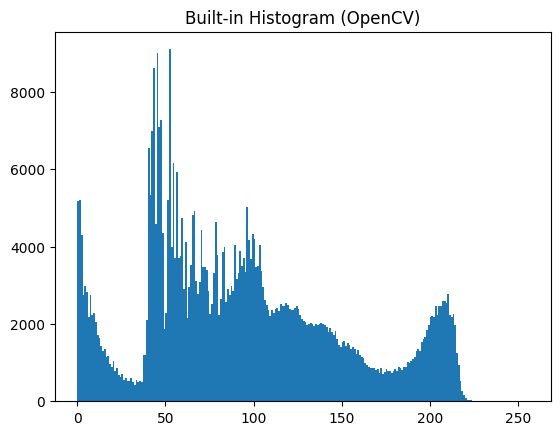

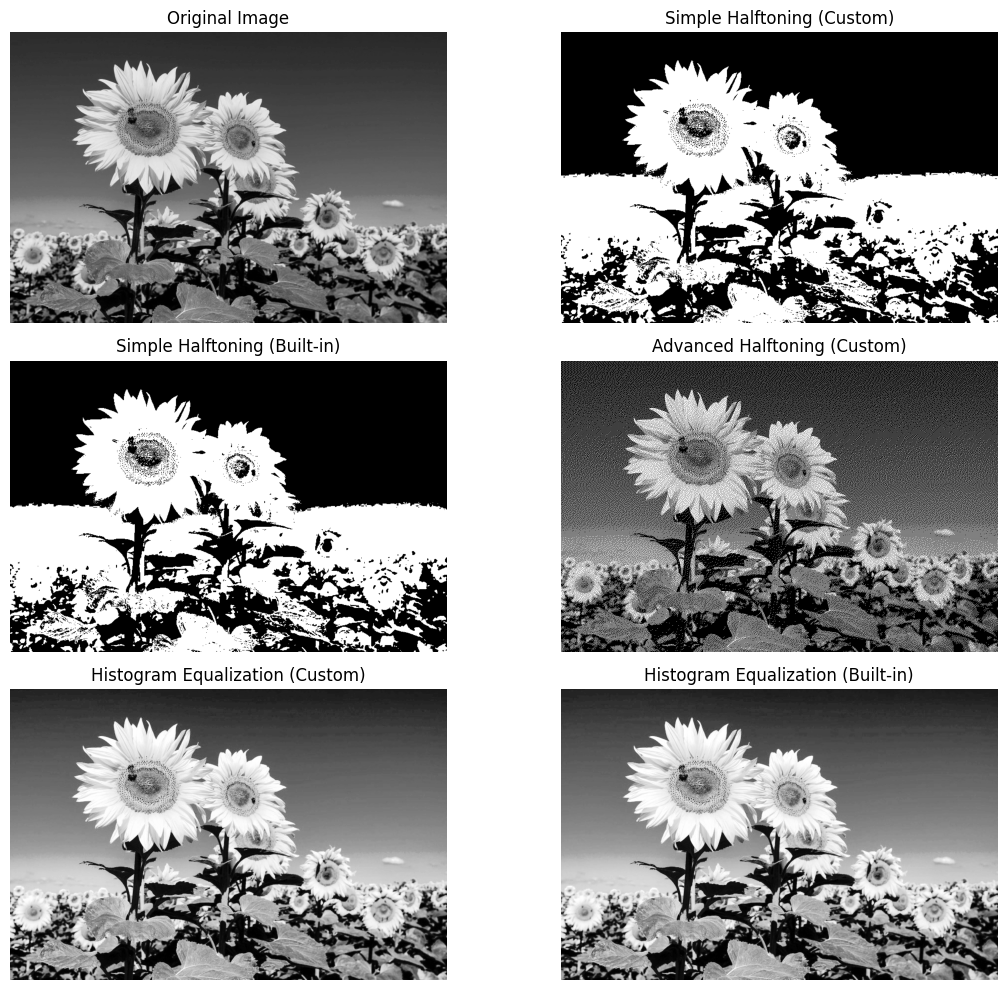

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imagePreprocessing import Thresholding, SimpleHalftoning, AdvancedHalftoning, Histogram, HistogramEqualization

# Example Usage
if __name__ == "__main__":
    # Load a sample image
    image_path = "Images/image.png"  # Replace with your image path
    sample_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate average threshold using custom implementation
    threshold = Thresholding.calculate_average_threshold(sample_image)

    # Apply custom simple halftoning
    simple_halftoned_image = SimpleHalftoning.apply_simple_halftoning(sample_image, threshold)

    # Apply custom advanced halftoning
    advanced_halftoned_image = AdvancedHalftoning.error_diffusion_halftoning(sample_image, threshold)

    # Apply built-in thresholding (using OpenCV)
    _, built_in_simple_threshold = cv2.threshold(sample_image, threshold, 255, cv2.THRESH_BINARY)

    # Apply histogram equalization using custom implementation
    equalized_image = HistogramEqualization.equalize(sample_image)

    # Apply histogram equalization using OpenCV
    built_in_equalized_image = cv2.equalizeHist(sample_image)

    # Generate and display histograms (for comparison)
    Histogram.plot_histogram(sample_image)
  

    plt.figure()
    plt.hist(sample_image.ravel(), bins=256, range=(0, 256))
    plt.title("Built-in Histogram (OpenCV)")
    plt.show()

    # Display all results for comparison
    comparison = {
        "Original Image": sample_image,
        "Simple Halftoning (Custom)": simple_halftoned_image,
        "Simple Halftoning (Built-in)": built_in_simple_threshold,
        "Advanced Halftoning (Custom)": advanced_halftoned_image,
        "Histogram Equalization (Custom)": equalized_image,
        "Histogram Equalization (Built-in)": built_in_equalized_image,
    }

    plt.figure(figsize=(12, 10))
    for i, (title, result) in enumerate(comparison.items(), 1):
        plt.subplot(3, 2, i)
        plt.imshow(result, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


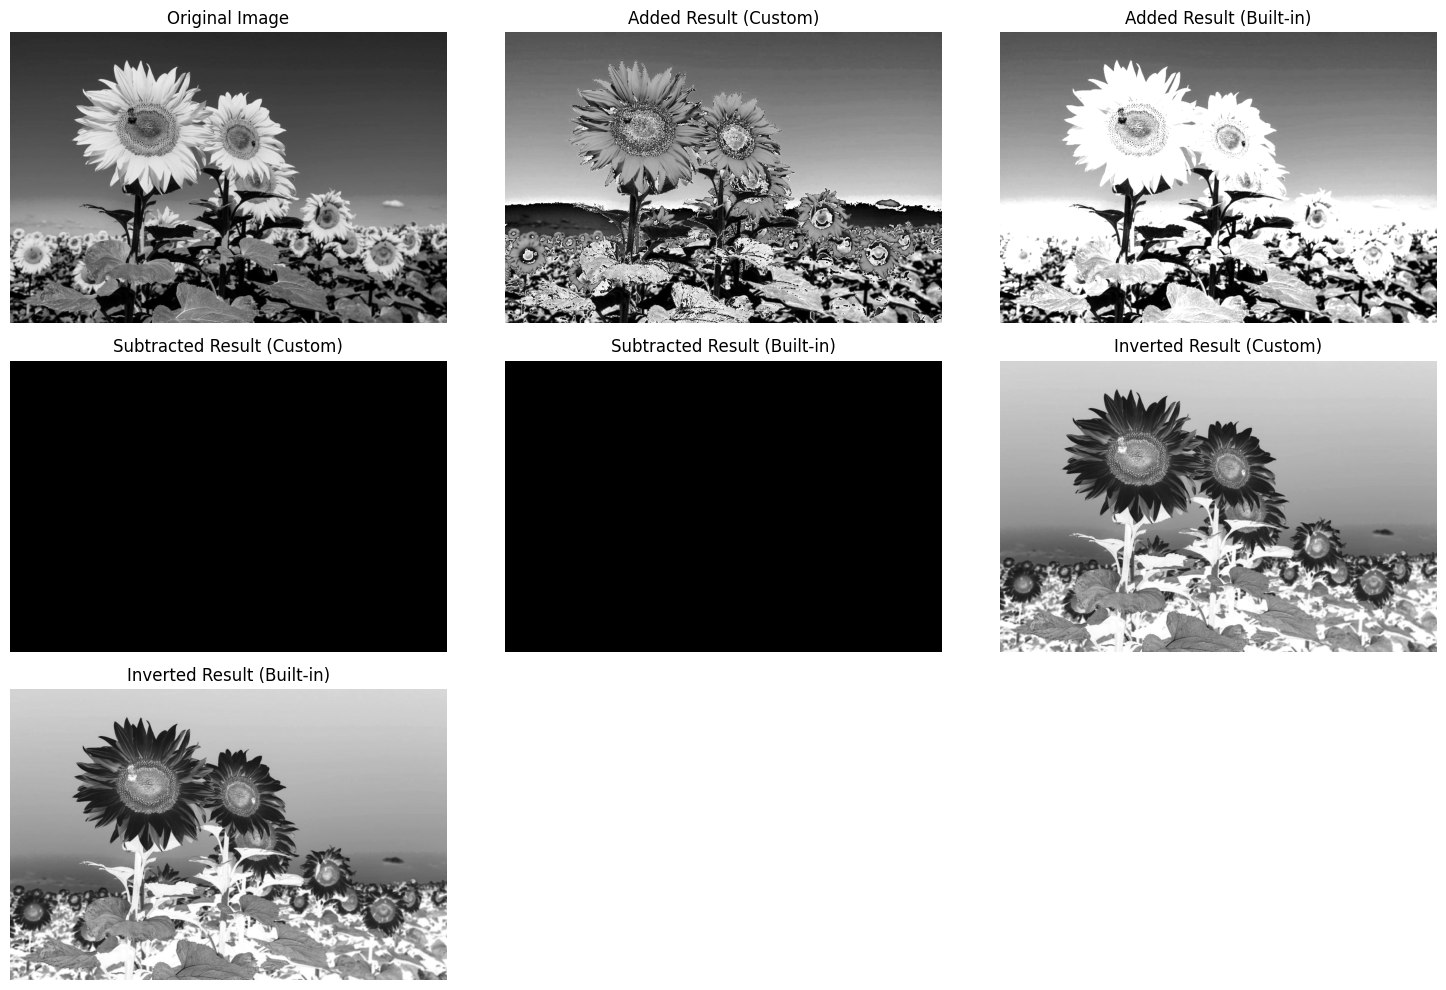

In [31]:
from operations import Operations
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example Usage
if __name__ == "__main__":
    # Load a sample image (ensure the path is valid)
    image_path = "Images/image.png"
    sample_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Example grayscale images
    image1 = sample_image
    image2 = sample_image

    # Perform operations using the custom Operations class
    added_result_custom = Operations.add(image1, image2)
    subtracted_result_custom = Operations.subtract(image1, image2)
    inverted_result_custom = Operations.invert(image1)

    # Perform equivalent operations using built-in functions
    added_result_builtin = cv2.add(image1, image2)
    subtracted_result_builtin = cv2.subtract(image1, image2)
    inverted_result_builtin = cv2.bitwise_not(image1)

    # Display the results
    results = {
        "Original Image": image1,
        "Added Result (Custom)": added_result_custom,
        "Added Result (Built-in)": added_result_builtin,
        "Subtracted Result (Custom)": subtracted_result_custom,
        "Subtracted Result (Built-in)": subtracted_result_builtin,
        "Inverted Result (Custom)": inverted_result_custom,
        "Inverted Result (Built-in)": inverted_result_builtin,
    }

    plt.figure(figsize=(15, 10))
    for i, (title, result) in enumerate(results.items(), 1):
        plt.subplot(3, 3, i)
        plt.imshow(result, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Thresholds: Low=48, High=52
Thresholds: Low=0, High=45
Thresholds: Low=0, High=45
New Thresholds: Low=0, High=24


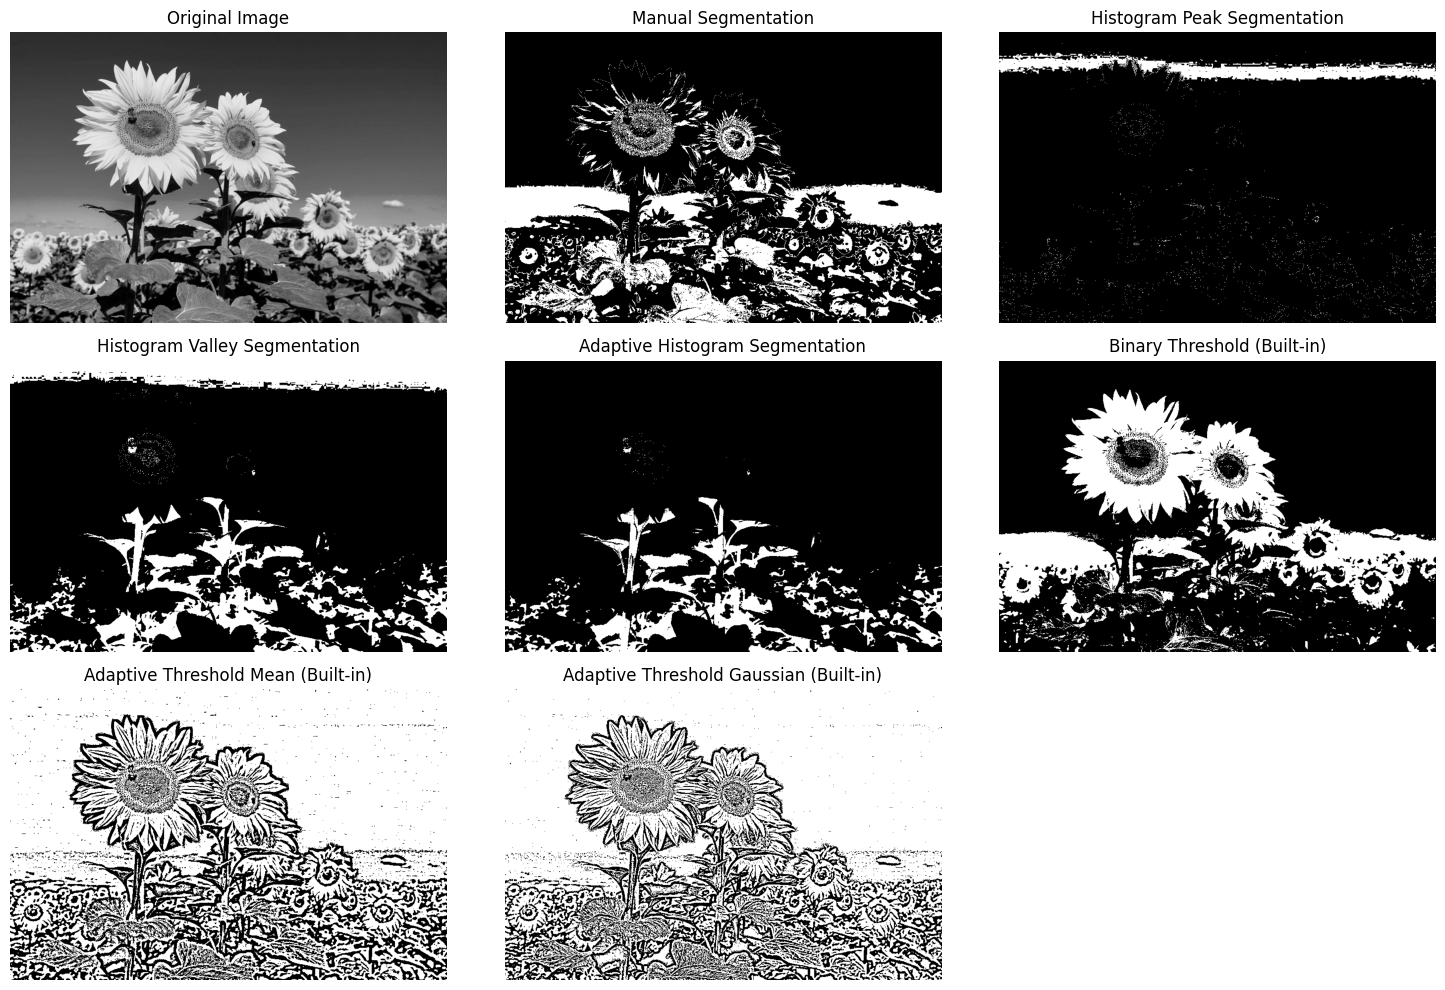

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segemetaion import (
    ManualSegmentation,
    HistogramPeakSegmentation,
    HistogramValleySegmentation,
    AdaptiveHistogramSegmentation,
)

# Load a sample image in grayscale
image_path = "Images/image.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Custom Segmentation Methods
manual_seg = ManualSegmentation.segment(image, 100, 150)
peak_seg = HistogramPeakSegmentation.segment(image)
valley_seg = HistogramValleySegmentation.segment(image)
adaptive_seg = AdaptiveHistogramSegmentation.segment(image)

# Built-in Methods for Comparison
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)

# Display Results
results = {
    "Original Image": image,
    "Manual Segmentation": manual_seg,
    "Histogram Peak Segmentation": peak_seg,
    "Histogram Valley Segmentation": valley_seg,
    "Adaptive Histogram Segmentation": adaptive_seg,
    "Binary Threshold (Built-in)": binary_thresh,
    "Adaptive Threshold Mean (Built-in)": adaptive_thresh_mean,
    "Adaptive Threshold Gaussian (Built-in)": adaptive_thresh_gaussian,
}

plt.figure(figsize=(15, 10))
for i, (title, result) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()
